In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, linregress
import os
from datetime import datetime
import sys
sys.path.append('/home/wallacelab/complexity-final/Optimizations/Bayesian')

import optimization

In [16]:
# Parameters
num_simulations = 1  # Number of simulations to run
task_name = "complexity_prediction"
predictor_columns = ["Irregularity", "Disorganized", "Asymmetry", "Chaotic", "Randomness", 
                     "Variability", "Multicolored", "Heterogeneity", "Grainy", "Isotropy", 
                     "Cluttered", "Ambiguity", "Intricate"]

In [3]:
all_weights = []
spearman_rhos = []

# Run the simulation multiple times
for _ in range(num_simulations):
    # Load your data (ensure these paths are correct)
    df1 = pd.read_csv('/home/wallacelab/complexity-final/Images/Savoias-Dataset/Ground truth/csv/global_ranking_ad.csv')
    df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-CBA/Savoias/Advertisement/savoias_advertisement_cba_embedding.csv')
    
    # Run the bayesian optimization function (make sure it's defined in this notebook or imported)
    mean_weights, se_weights, mean_rho, se_rho = optimization.bayesian_optimization_fit(df1, df2, predictor_columns, task_name=task_name, cross_validate=True)
    all_weights.append(mean_weights)
    spearman_rhos.append(mean_rho)

# Find the best (highest) Spearman rho and corresponding weights
best_rho_index = np.argmax(spearman_rhos)
best_rho = spearman_rhos[best_rho_index]
best_weights = all_weights[best_rho_index]

# Calculate predictions for each image using the best weights
# Assuming `df2` contains predictor columns and `df1` contains the actual values
df1 = pd.read_csv('/home/wallacelab/complexity-final/Images/Savoias-Dataset/Ground truth/csv/global_ranking_ad.csv')
df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-CBA/Savoias/Advertisement/savoias_advertisement_cba_embedding.csv')

# Ensure that df1 and df2 are aligned by merging on 'image' column if necessary
if 'image' in df1.columns and 'image' in df2.columns:
    combined_df = pd.merge(df1, df2, on='image')
    y_true = combined_df['Normalized Average'].values
    X = combined_df[predictor_columns].values
else:
    y_true = df1['Normalized Average'].values
    X = df2[predictor_columns].values

# Get predicted values by multiplying X by best weights
y_pred = X @ best_weights

# Calculate the line of best fit for predicted vs. actual
slope, intercept, _, _, _ = linregress(y_pred, y_true)  # Predicted (x) vs. Actual (y)
line_x = np.linspace(y_pred.min(), y_pred.max(), 100)  # Restrict line_x to the range of predicted values
line_y = slope * line_x + intercept  # Compute corresponding y values using the regression equation

Results will be saved in: ./output/optimization_results_20241211_152342
Starting cross-validation...

Processing fold 1/5
Calculating initial Spearman correlations for each predictor...
Predictor Irregularity: Initial Spearman rho = 0.0009963530791608063
Predictor Disorganized: Initial Spearman rho = -0.077343372994974
Predictor Asymmetry: Initial Spearman rho = -0.07404515125792845
Predictor Chaotic: Initial Spearman rho = 0.2706109615251914
Predictor Randomness: Initial Spearman rho = 0.03771635972158576
Predictor Variability: Initial Spearman rho = -0.05820313729927164
Predictor Multicolored: Initial Spearman rho = 0.36703303076097843
Predictor Heterogeneity: Initial Spearman rho = -0.016984889549458922
Predictor Grainy: Initial Spearman rho = -0.11901730575599113
Predictor Isotropy: Initial Spearman rho = 0.17429878417313535
Predictor Cluttered: Initial Spearman rho = -0.19815118384322175
Predictor Ambiguity: Initial Spearman rho = -0.14222500637485588
Predictor Intricate: Initial 

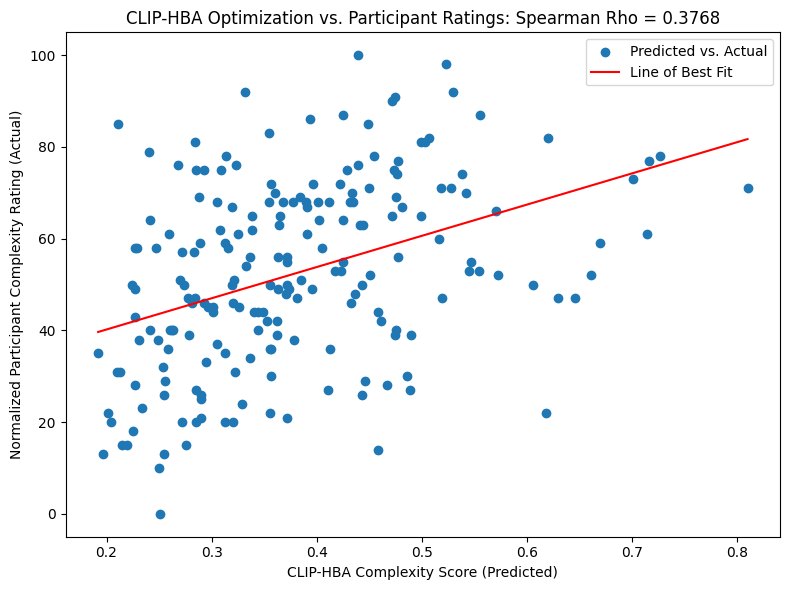

In [4]:
# Plot the scatter plot and line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_true, label="Predicted vs. Actual")  # Predicted on x, Actual on y
plt.plot(line_x, line_y, color="red", label="Line of Best Fit")  # Best-fit line for predicted vs. actual
plt.xlabel("CLIP-HBA Complexity Score (Predicted)")
plt.ylabel("Normalized Participant Complexity Rating (Actual)")
plt.title(f"CLIP-HBA Optimization vs. Participant Ratings: Spearman Rho = {best_rho:.4f}")
plt.legend()
plt.tight_layout()
plt.show()

In [5]:
all_weights = []
spearman_rhos = []

# Run the simulation multiple times
for _ in range(num_simulations):
    # Load your data (ensure these paths are correct)
    df1 = pd.read_csv('/home/wallacelab/complexity-final/Images/Savoias-Dataset/Ground truth/csv/global_ranking_art.csv')
    df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-CBA/Savoias/Art/savoias_art_cba_embedding.csv')
    
    # Run the bayesian optimization function (make sure it's defined in this notebook or imported)
    mean_weights, se_weights, mean_rho, se_rho = optimization.bayesian_optimization_fit(df1, df2, predictor_columns, task_name=task_name, cross_validate=True)
    all_weights.append(mean_weights)
    spearman_rhos.append(mean_rho)

# Find the best (highest) Spearman rho and corresponding weights
best_rho_index = np.argmax(spearman_rhos)
best_rho = spearman_rhos[best_rho_index]
best_weights = all_weights[best_rho_index]

# Calculate predictions for each image using the best weights
# Assuming `df2` contains predictor columns and `df1` contains the actual values
df1 = pd.read_csv('/home/wallacelab/complexity-final/Images/Savoias-Dataset/Ground truth/csv/global_ranking_art.csv')
df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-CBA/Savoias/Art/savoias_art_cba_embedding.csv')

# Ensure that df1 and df2 are aligned by merging on 'image' column if necessary
if 'image' in df1.columns and 'image' in df2.columns:
    combined_df = pd.merge(df1, df2, on='image')
    y_true = combined_df['Normalized Average'].values
    X = combined_df[predictor_columns].values
else:
    y_true = df1['Normalized Average'].values
    X = df2[predictor_columns].values

# Get predicted values by multiplying X by best weights
y_pred = X @ best_weights

# Calculate the line of best fit for predicted vs. actual
slope, intercept, _, _, _ = linregress(y_pred, y_true)  # Predicted (x) vs. Actual (y)
line_x = np.linspace(y_pred.min(), y_pred.max(), 100)  # Restrict line_x to the range of predicted values
line_y = slope * line_x + intercept  # Compute corresponding y values using the regression equation

Results will be saved in: ./output/optimization_results_20241211_153824
Starting cross-validation...

Processing fold 1/5
Calculating initial Spearman correlations for each predictor...
Predictor Irregularity: Initial Spearman rho = -0.07824857438285247
Predictor Disorganized: Initial Spearman rho = 0.09212138159750755
Predictor Asymmetry: Initial Spearman rho = -0.08010037014611138
Predictor Chaotic: Initial Spearman rho = 0.5299029214930528
Predictor Randomness: Initial Spearman rho = 0.08342983754994787
Predictor Variability: Initial Spearman rho = -0.20313595229441173
Predictor Multicolored: Initial Spearman rho = 0.34126510946063626
Predictor Heterogeneity: Initial Spearman rho = -0.1239417060276739
Predictor Grainy: Initial Spearman rho = -0.1822182217480488
Predictor Isotropy: Initial Spearman rho = -0.2395300825423728
Predictor Cluttered: Initial Spearman rho = 0.0855137010036818
Predictor Ambiguity: Initial Spearman rho = -0.4025169006564403
Predictor Intricate: Initial Spearm

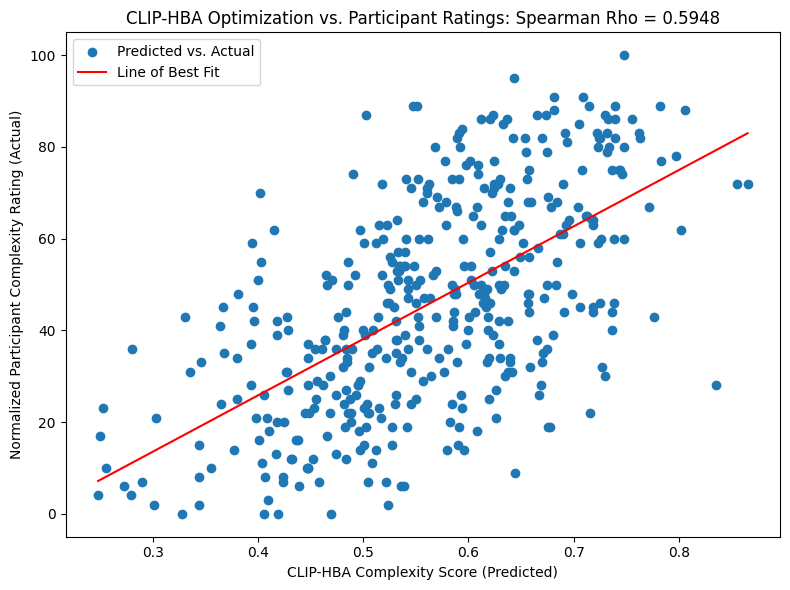

In [6]:
# Plot the scatter plot and line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_true, label="Predicted vs. Actual")  # Predicted on x, Actual on y
plt.plot(line_x, line_y, color="red", label="Line of Best Fit")  # Best-fit line for predicted vs. actual
plt.xlabel("CLIP-HBA Complexity Score (Predicted)")
plt.ylabel("Normalized Participant Complexity Rating (Actual)")
plt.title(f"CLIP-HBA Optimization vs. Participant Ratings: Spearman Rho = {best_rho:.4f}")
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
all_weights = []
spearman_rhos = []

# Run the simulation multiple times
for _ in range(num_simulations):
    # Load your data (ensure these paths are correct)
    df1 = pd.read_csv('/home/wallacelab/complexity-final/Images/Savoias-Dataset/Ground truth/csv/global_ranking_interior_design.csv')
    df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-CBA/Savoias/Interior_Design/savoias_interior_design_cba_embedding.csv')
    
    # Run the bayesian optimization function (make sure it's defined in this notebook or imported)
    mean_weights, se_weights, mean_rho, se_rho = optimization.bayesian_optimization_fit(df1, df2, predictor_columns, task_name=task_name, cross_validate=True)
    all_weights.append(mean_weights)
    spearman_rhos.append(mean_rho)

# Find the best (highest) Spearman rho and corresponding weights
best_rho_index = np.argmax(spearman_rhos)
best_rho = spearman_rhos[best_rho_index]
best_weights = all_weights[best_rho_index]

# Calculate predictions for each image using the best weights
# Assuming `df2` contains predictor columns and `df1` contains the actual values
df1 = pd.read_csv('/home/wallacelab/complexity-final/Images/Savoias-Dataset/Ground truth/csv/global_ranking_interior_design.csv')
df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-CBA/Savoias/Interior_Design/savoias_interior_design_cba_embedding.csv')

# Ensure that df1 and df2 are aligned by merging on 'image' column if necessary
if 'image' in df1.columns and 'image' in df2.columns:
    combined_df = pd.merge(df1, df2, on='image')
    y_true = combined_df['Normalized Average'].values
    X = combined_df[predictor_columns].values
else:
    y_true = df1['Normalized Average'].values
    X = df2[predictor_columns].values

# Get predicted values by multiplying X by best weights
y_pred = X @ best_weights

# Calculate the line of best fit for predicted vs. actual
slope, intercept, _, _, _ = linregress(y_pred, y_true)  # Predicted (x) vs. Actual (y)
line_x = np.linspace(y_pred.min(), y_pred.max(), 100)  # Restrict line_x to the range of predicted values
line_y = slope * line_x + intercept  # Compute corresponding y values using the regression equation

Results will be saved in: ./output/optimization_results_20241211_155242
Starting cross-validation...

Processing fold 1/5
Calculating initial Spearman correlations for each predictor...
Predictor Irregularity: Initial Spearman rho = -0.2997186483322403
Predictor Disorganized: Initial Spearman rho = 0.03558030578457128
Predictor Asymmetry: Initial Spearman rho = -0.2999882849164397
Predictor Chaotic: Initial Spearman rho = 0.4420515948002733
Predictor Randomness: Initial Spearman rho = 0.3573036440534311
Predictor Variability: Initial Spearman rho = -0.47082064600137313
Predictor Multicolored: Initial Spearman rho = 0.5517585145801803
Predictor Heterogeneity: Initial Spearman rho = -0.2629660095728891
Predictor Grainy: Initial Spearman rho = -0.49203987284489
Predictor Isotropy: Initial Spearman rho = -0.39788981164031284
Predictor Cluttered: Initial Spearman rho = 0.6232122093930178
Predictor Ambiguity: Initial Spearman rho = -0.6193435105762441
Predictor Intricate: Initial Spearman rh

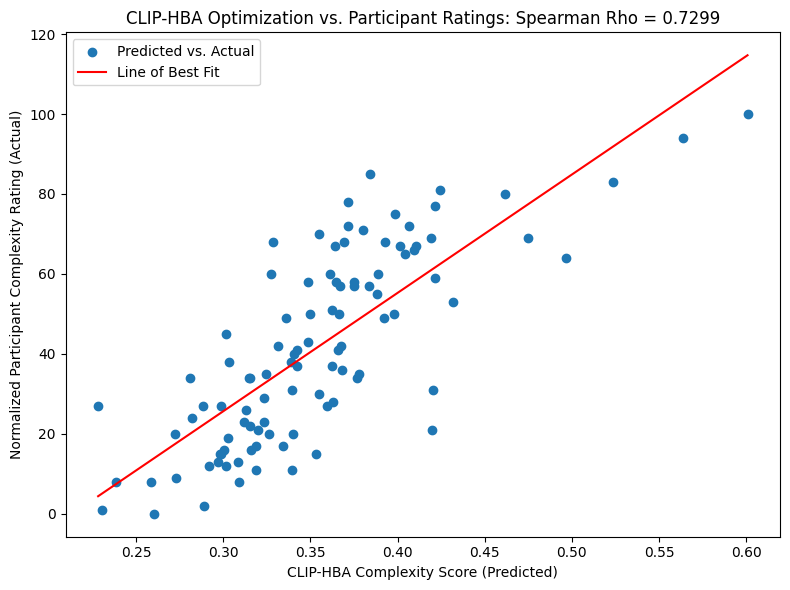

In [8]:
# Plot the scatter plot and line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_true, label="Predicted vs. Actual")  # Predicted on x, Actual on y
plt.plot(line_x, line_y, color="red", label="Line of Best Fit")  # Best-fit line for predicted vs. actual
plt.xlabel("CLIP-HBA Complexity Score (Predicted)")
plt.ylabel("Normalized Participant Complexity Rating (Actual)")
plt.title(f"CLIP-HBA Optimization vs. Participant Ratings: Spearman Rho = {best_rho:.4f}")
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
all_weights = []
spearman_rhos = []

# Run the simulation multiple times
for _ in range(num_simulations):
    # Load your data (ensure these paths are correct)
    df1 = pd.read_csv('/home/wallacelab/complexity-final/Images/Savoias-Dataset/Ground truth/csv/global_ranking_objects.csv')
    df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-CBA/Savoias/Objects/savoias_objects_cba_embedding.csv')
    
    # Run the bayesian optimization function (make sure it's defined in this notebook or imported)
    mean_weights, se_weights, mean_rho, se_rho = optimization.bayesian_optimization_fit(df1, df2, predictor_columns, task_name=task_name, cross_validate=True)
    all_weights.append(mean_weights)
    spearman_rhos.append(mean_rho)

# Find the best (highest) Spearman rho and corresponding weights
best_rho_index = np.argmax(spearman_rhos)
best_rho = spearman_rhos[best_rho_index]
best_weights = all_weights[best_rho_index]

# Calculate predictions for each image using the best weights
# Assuming `df2` contains predictor columns and `df1` contains the actual values
df1 = pd.read_csv('/home/wallacelab/complexity-final/Images/Savoias-Dataset/Ground truth/csv/global_ranking_objects.csv')
df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-CBA/Savoias/Objects/savoias_objects_cba_embedding.csv')

# Ensure that df1 and df2 are aligned by merging on 'image' column if necessary
if 'image' in df1.columns and 'image' in df2.columns:
    combined_df = pd.merge(df1, df2, on='image')
    y_true = combined_df['Normalized Average'].values
    X = combined_df[predictor_columns].values
else:
    y_true = df1['Normalized Average'].values
    X = df2[predictor_columns].values

# Get predicted values by multiplying X by best weights
y_pred = X @ best_weights

# Calculate the line of best fit for predicted vs. actual
slope, intercept, _, _, _ = linregress(y_pred, y_true)  # Predicted (x) vs. Actual (y)
line_x = np.linspace(y_pred.min(), y_pred.max(), 100)  # Restrict line_x to the range of predicted values
line_y = slope * line_x + intercept  # Compute corresponding y values using the regression equation

Results will be saved in: ./output/optimization_results_20241211_160529
Starting cross-validation...

Processing fold 1/5
Calculating initial Spearman correlations for each predictor...
Predictor Irregularity: Initial Spearman rho = -0.04903572679839271
Predictor Disorganized: Initial Spearman rho = -0.049038657278689037
Predictor Asymmetry: Initial Spearman rho = -0.07260704506187635
Predictor Chaotic: Initial Spearman rho = 0.25699579578689086
Predictor Randomness: Initial Spearman rho = -0.03388074794595215
Predictor Variability: Initial Spearman rho = -0.12786711200966164
Predictor Multicolored: Initial Spearman rho = 0.025062932734312655
Predictor Heterogeneity: Initial Spearman rho = -0.13768129052205136
Predictor Grainy: Initial Spearman rho = -0.17163530047541162
Predictor Isotropy: Initial Spearman rho = -0.09537101600372268
Predictor Cluttered: Initial Spearman rho = 0.14828083775385595
Predictor Ambiguity: Initial Spearman rho = -0.28921935712527164
Predictor Intricate: Init

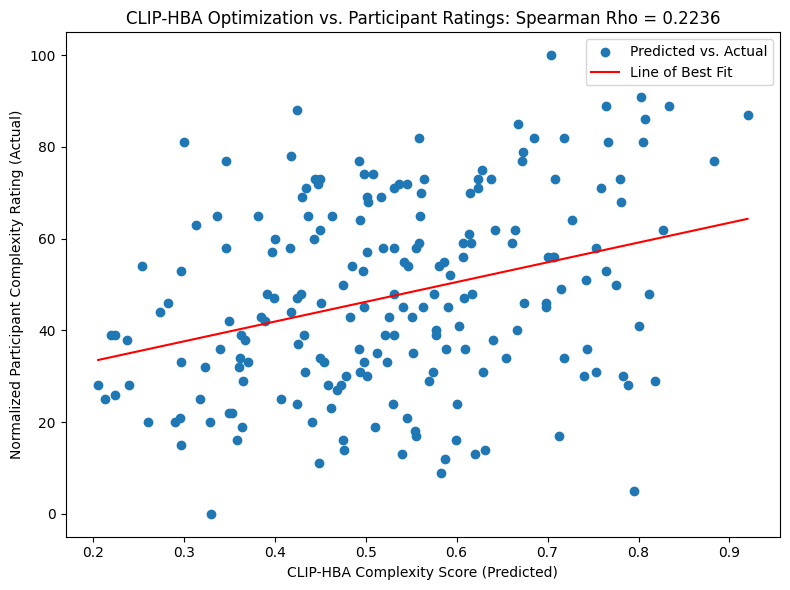

In [10]:
# Plot the scatter plot and line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_true, label="Predicted vs. Actual")  # Predicted on x, Actual on y
plt.plot(line_x, line_y, color="red", label="Line of Best Fit")  # Best-fit line for predicted vs. actual
plt.xlabel("CLIP-HBA Complexity Score (Predicted)")
plt.ylabel("Normalized Participant Complexity Rating (Actual)")
plt.title(f"CLIP-HBA Optimization vs. Participant Ratings: Spearman Rho = {best_rho:.4f}")
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
all_weights = []
spearman_rhos = []

# Run the simulation multiple times
for _ in range(num_simulations):
    # Load your data (ensure these paths are correct)
    df1 = pd.read_csv('/home/wallacelab/complexity-final/Images/Savoias-Dataset/Ground truth/csv/global_ranking_scenes.csv')
    df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-CBA/Savoias/Scenes/savoias_scenes_cba_embedding.csv')
    
    # Run the bayesian optimization function (make sure it's defined in this notebook or imported)
    mean_weights, se_weights, mean_rho, se_rho = optimization.bayesian_optimization_fit(df1, df2, predictor_columns, task_name=task_name, cross_validate=True)
    all_weights.append(mean_weights)
    spearman_rhos.append(mean_rho)

# Find the best (highest) Spearman rho and corresponding weights
best_rho_index = np.argmax(spearman_rhos)
best_rho = spearman_rhos[best_rho_index]
best_weights = all_weights[best_rho_index]

# Calculate predictions for each image using the best weights
# Assuming `df2` contains predictor columns and `df1` contains the actual values
df1 = pd.read_csv('/home/wallacelab/complexity-final/Images/Savoias-Dataset/Ground truth/csv/global_ranking_scenes.csv')
df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-CBA/Savoias/Scenes/savoias_scenes_cba_embedding.csv')

# Ensure that df1 and df2 are aligned by merging on 'image' column if necessary
if 'image' in df1.columns and 'image' in df2.columns:
    combined_df = pd.merge(df1, df2, on='image')
    y_true = combined_df['Normalized Average'].values
    X = combined_df[predictor_columns].values
else:
    y_true = df1['Normalized Average'].values
    X = df2[predictor_columns].values

# Get predicted values by multiplying X by best weights
y_pred = X @ best_weights

# Calculate the line of best fit for predicted vs. actual
slope, intercept, _, _, _ = linregress(y_pred, y_true)  # Predicted (x) vs. Actual (y)
line_x = np.linspace(y_pred.min(), y_pred.max(), 100)  # Restrict line_x to the range of predicted values
line_y = slope * line_x + intercept  # Compute corresponding y values using the regression equation

Results will be saved in: ./output/optimization_results_20241211_162003
Starting cross-validation...

Processing fold 1/5
Calculating initial Spearman correlations for each predictor...
Predictor Irregularity: Initial Spearman rho = -0.03862663913804742
Predictor Disorganized: Initial Spearman rho = -0.3039036297511541
Predictor Asymmetry: Initial Spearman rho = -0.09131131764828963
Predictor Chaotic: Initial Spearman rho = 0.4245281720857848
Predictor Randomness: Initial Spearman rho = 0.03434211681948399
Predictor Variability: Initial Spearman rho = -0.09050247485764429
Predictor Multicolored: Initial Spearman rho = 0.2930472597585972
Predictor Heterogeneity: Initial Spearman rho = -0.21010277604977304
Predictor Grainy: Initial Spearman rho = -0.17003135612988446
Predictor Isotropy: Initial Spearman rho = -0.2185897641719069
Predictor Cluttered: Initial Spearman rho = 0.1951904697447046
Predictor Ambiguity: Initial Spearman rho = -0.37706726993179385
Predictor Intricate: Initial Spea

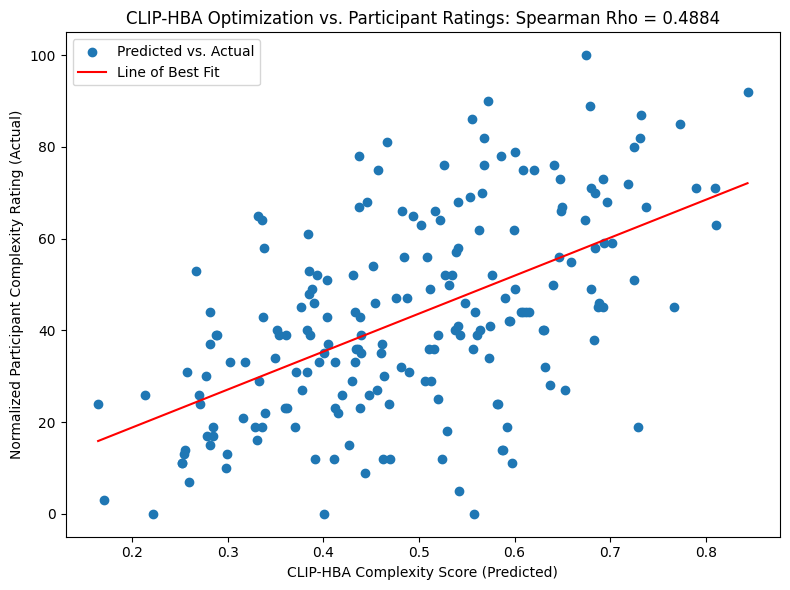

In [12]:
# Plot the scatter plot and line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_true, label="Predicted vs. Actual")  # Predicted on x, Actual on y
plt.plot(line_x, line_y, color="red", label="Line of Best Fit")  # Best-fit line for predicted vs. actual
plt.xlabel("CLIP-HBA Complexity Score (Predicted)")
plt.ylabel("Normalized Participant Complexity Rating (Actual)")
plt.title(f"CLIP-HBA Optimization vs. Participant Ratings: Spearman Rho = {best_rho:.4f}")
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
all_weights = []
spearman_rhos = []

# Run the simulation multiple times
for _ in range(num_simulations):
    # Load your data (ensure these paths are correct)
    df1 = pd.read_csv('/home/wallacelab/complexity-final/Images/Savoias-Dataset/Ground truth/csv/global_ranking_sup.csv')
    df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-CBA/Savoias/Suprematism/savoias_suprematism_cba_embedding.csv')
    
    # Run the bayesian optimization function (make sure it's defined in this notebook or imported)
    mean_weights, se_weights, mean_rho, se_rho = optimization.bayesian_optimization_fit(df1, df2, predictor_columns, task_name=task_name, cross_validate=True)
    all_weights.append(mean_weights)
    spearman_rhos.append(mean_rho)

# Find the best (highest) Spearman rho and corresponding weights
best_rho_index = np.argmax(spearman_rhos)
best_rho = spearman_rhos[best_rho_index]
best_weights = all_weights[best_rho_index]

# Calculate predictions for each image using the best weights
# Assuming `df2` contains predictor columns and `df1` contains the actual values
df1 = pd.read_csv('/home/wallacelab/complexity-final/Images/Savoias-Dataset/Ground truth/csv/global_ranking_sup.csv')
df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-CBA/Savoias/Suprematism/savoias_suprematism_cba_embedding.csv')

# Ensure that df1 and df2 are aligned by merging on 'image' column if necessary
if 'image' in df1.columns and 'image' in df2.columns:
    combined_df = pd.merge(df1, df2, on='image')
    y_true = combined_df['Normalized Average'].values
    X = combined_df[predictor_columns].values
else:
    y_true = df1['Normalized Average'].values
    X = df2[predictor_columns].values

# Get predicted values by multiplying X by best weights
y_pred = X @ best_weights

# Calculate the line of best fit for predicted vs. actual
slope, intercept, _, _, _ = linregress(y_pred, y_true)  # Predicted (x) vs. Actual (y)
line_x = np.linspace(y_pred.min(), y_pred.max(), 100)  # Restrict line_x to the range of predicted values
line_y = slope * line_x + intercept  # Compute corresponding y values using the regression equation

Results will be saved in: ./output/optimization_results_20241211_192013
Starting cross-validation...

Processing fold 1/5
Calculating initial Spearman correlations for each predictor...
Predictor Irregularity: Initial Spearman rho = -0.23410380176831516
Predictor Disorganized: Initial Spearman rho = 0.3017627080185629
Predictor Asymmetry: Initial Spearman rho = 0.1428797592222785
Predictor Chaotic: Initial Spearman rho = 0.5098862401194809
Predictor Randomness: Initial Spearman rho = 0.028665053852340274
Predictor Variability: Initial Spearman rho = -0.47750469462248146
Predictor Multicolored: Initial Spearman rho = 0.5732190094079644
Predictor Heterogeneity: Initial Spearman rho = -0.35419220528959183
Predictor Grainy: Initial Spearman rho = -0.33871659339384985
Predictor Isotropy: Initial Spearman rho = 0.07442362448043194
Predictor Cluttered: Initial Spearman rho = -0.09304125454894577
Predictor Ambiguity: Initial Spearman rho = -0.11249128495427606
Predictor Intricate: Initial Spea

NotUniqueError: Data point [0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1.] is not unique. You can set "allow_duplicate_points=True" to avoid this error

In [ ]:
# Plot the scatter plot and line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_true, label="Predicted vs. Actual")  # Predicted on x, Actual on y
plt.plot(line_x, line_y, color="red", label="Line of Best Fit")  # Best-fit line for predicted vs. actual
plt.xlabel("CLIP-HBA Complexity Score (Predicted)")
plt.ylabel("Normalized Participant Complexity Rating (Actual)")
plt.title(f"CLIP-HBA Optimization vs. Participant Ratings: Spearman Rho = {best_rho:.4f}")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
all_weights = []
spearman_rhos = []

# Run the simulation multiple times
for _ in range(num_simulations):
    # Load your data (ensure these paths are correct)
    df1 = pd.read_csv('/home/wallacelab/complexity-final/Images/Savoias-Dataset/Ground truth/csv/global_ranking_vis.csv')
    df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-CBA/Savoias/Visualizations/savoias_visualizations_cba_embedding.csv')
    
    # Run the bayesian optimization function (make sure it's defined in this notebook or imported)
    mean_weights, se_weights, mean_rho, se_rho = optimization.bayesian_optimization_fit(df1, df2, predictor_columns, task_name=task_name, cross_validate=True)
    all_weights.append(mean_weights)
    spearman_rhos.append(mean_rho)

# Find the best (highest) Spearman rho and corresponding weights
best_rho_index = np.argmax(spearman_rhos)
best_rho = spearman_rhos[best_rho_index]
best_weights = all_weights[best_rho_index]

# Calculate predictions for each image using the best weights
# Assuming `df2` contains predictor columns and `df1` contains the actual values
df1 = pd.read_csv('/home/wallacelab/complexity-final/Images/Savoias-Dataset/Ground truth/csv/global_ranking_vis.csv')
df2 = pd.read_csv('/home/wallacelab/complexity-final/Embeddings/CLIP-CBA/Savoias/Visualizations/savoias_visualizations_cba_embedding.csv')

# Ensure that df1 and df2 are aligned by merging on 'image' column if necessary
if 'image' in df1.columns and 'image' in df2.columns:
    combined_df = pd.merge(df1, df2, on='image')
    y_true = combined_df['Normalized Average'].values
    X = combined_df[predictor_columns].values
else:
    y_true = df1['Normalized Average'].values
    X = df2[predictor_columns].values

# Get predicted values by multiplying X by best weights
y_pred = X @ best_weights

# Calculate the line of best fit for predicted vs. actual
slope, intercept, _, _, _ = linregress(y_pred, y_true)  # Predicted (x) vs. Actual (y)
line_x = np.linspace(y_pred.min(), y_pred.max(), 100)  # Restrict line_x to the range of predicted values
line_y = slope * line_x + intercept  # Compute corresponding y values using the regression equation

In [ ]:
# Plot the scatter plot and line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_true, label="Predicted vs. Actual")  # Predicted on x, Actual on y
plt.plot(line_x, line_y, color="red", label="Line of Best Fit")  # Best-fit line for predicted vs. actual
plt.xlabel("CLIP-HBA Complexity Score (Predicted)")
plt.ylabel("Normalized Participant Complexity Rating (Actual)")
plt.title(f"CLIP-HBA Optimization vs. Participant Ratings: Spearman Rho = {best_rho:.4f}")
plt.legend()
plt.tight_layout()
plt.show()